<a href="https://colab.research.google.com/github/cjimenez275/Simulacion_Fisica/blob/main/7_ODEINT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuaciones diferenciales utlizando ODEINT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Ecuaciones diferenciales de primer grado

Solucionemos la ED:
$$\frac{dx}{dt}=4x\hspace{0.8cm}x(0)=2$$

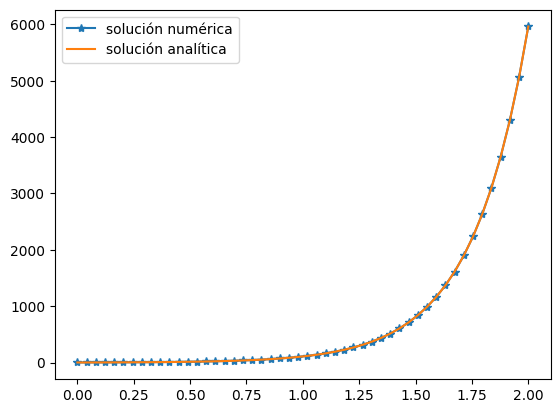

In [ ]:
# Definición de parámetros
t0, x0 = 0, 2
# Definición de la ecuación
def ecuacion(x, t):
  f=4*x
  return f
t = np.linspace(0, 2, 50)
# Solución analítica
z = lambda t: 2*np.exp(4*t)
# Solución numérica
xsol = odeint(ecuacion, x0, t)
# Gráficas
plt.plot(t, xsol, label="solución numérica", marker='*')
plt.plot(t, z(t), label="solución analítica")
plt.legend()
plt.show()

## Ecuaciones diferenciales de segundo grado

Solucionemos la ED:
 $$x'' + fx' + gx + h = 0$$
 $$x(0)=a\hspace{0.8cm}x'(0)=b$$
 $$x''= - fx' - gx - h$$
 $$\vec{R}=(x, x')$$
 $$F=(x', - fx' - gx - h)$$
 Muchas veces tomaremos $x' = v$

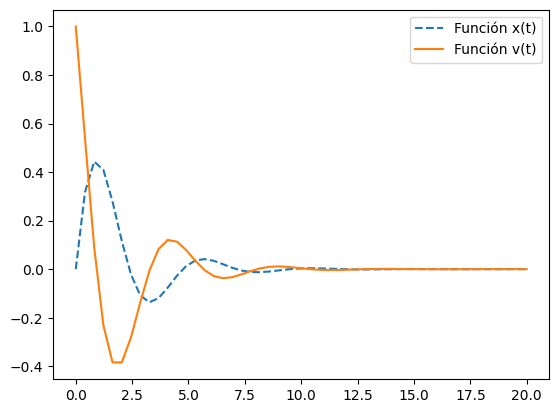

In [ ]:
f, g, h = 1, 2, 0
x0, v0 = 0, 1
R0 = [x0, v0]
# Definimos la ecuación
def ecuacion(R0, t):
  x, v = R0
  F = [v, -f*v-g*x-h]
  return F
t = np.linspace(0, 20, 50)
# Solucionamos la ecuación
xsol = odeint(ecuacion, R0, t)
# Graficar resultados
plt.plot(t, xsol[:, 0], label='Función x(t)', linestyle='dashed')
plt.plot(t, xsol[:, 1], label='Función v(t)')
plt.legend()
plt.show()

### Solucionemos la ED de un movimiento armónico simple amortiguado:
$$-kx-bv=ma$$
$$-kx-bx'=mx''$$
$$x''=-\frac{kx}{m}-\frac{bx''}{m}$$
Con condición inicial: $x(0)=1$ y $v(0)=0$.

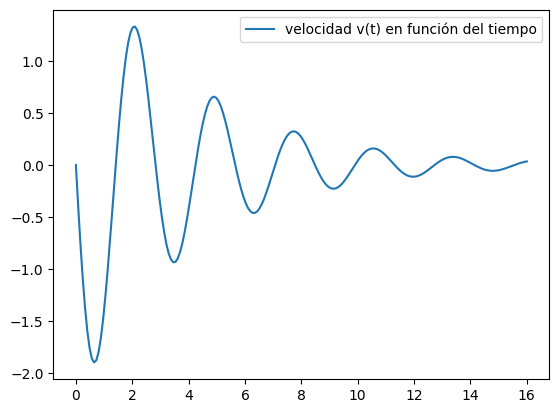

In [ ]:
k, b, m = 1, 0.1, 0.2
x0, v0 = 1, 0
R0 = [x0, v0]
# Definimos la ecuación
def ecuacion(R0, t):
  x, v = R0
  F = [v, -(b*v/m)-(k*x/m)]
  return F
t = np.linspace(0, 16, 200)
# Solucionamos la ecuación
xsol = odeint(ecuacion, R0, t)
# Graficar resultados
#plt.plot(t, xsol[:, 0], label='Posición x(t) de un MAS')
plt.plot(t, xsol[:, 1], label='velocidad v(t) en función del tiempo')
plt.legend()
plt.show()

### Esfera que cae en un fluido:

La fuerza de fricción "Damping" en un fluido es de la forma $Fd=\frac{1}{2}\rho_f Cd A v^2$.

Donde $\rho_f$ es la densidad del fluido, Cd el coeficiente de arrastre (para una esfera es de 0.47), A es el área transversal y v es la velocidad.

Si tenemos en cuenta además el empuje $E=\rho_f V g$, entonces, tomando un sistema de referencia hacia abajo la ecuación de movimiento es de la forma:
$$mg-\rho_f V g-\frac{1}{2}\rho_f Cd A v^2=ma$$
Demuestre que para un esfera de densidad $\rho$ y radio r esta ecuación se puede llevar a la forma:
$$x''=(1-\frac{\rho_f}{\rho})g-\alpha v^2\hspace{1cm}\alpha=\frac{3\rho_f Cd}{8\rho r}$$

In [ ]:
# Solución del problema sin fricción y sin empuje
# para una esfera de aluminio (27000kg/m3) de 5mm de radio que cae en el aire (1.2kg/m3)
g, p, pf, r, Cd = 9.8, 2700, 0, 0.005, 0
a = 3*Cd*pf/(8*r*p)
x0, v0 = 0, 0
R0 = [x0, v0]
# Definimos la ecuación
def ecuacion(R0, t):
  x, v = R0
  F = [v, (1-(pf/p))*g-a*v**2]
  return F
t = np.linspace(0, 1, 200)
# Solucionamos la ecuación
xsol1 = odeint(ecuacion, R0, t)

In [ ]:
# Solución del problema con fricción y con empuje
# para una esfera de aluminio (27000kg/m3) de 5mm de radio que cae en el aire (1.2kg/m3)
g, p, pf, r, Cd = 9.8, 2700, 1.2, 0.005, 0.4
a = 3*Cd*pf/(8*r*p)
x0, v0 = 0, 0
R0 = [x0, v0]
# Definimos la ecuación
def ecuacion(R0, t):
  x, v = R0
  F = [v, (1-(pf/p))*g-a*v**2]
  return F
t = np.linspace(0, 1, 200)
# Solucionamos la ecuación
xsol2 = odeint(ecuacion, R0, t)

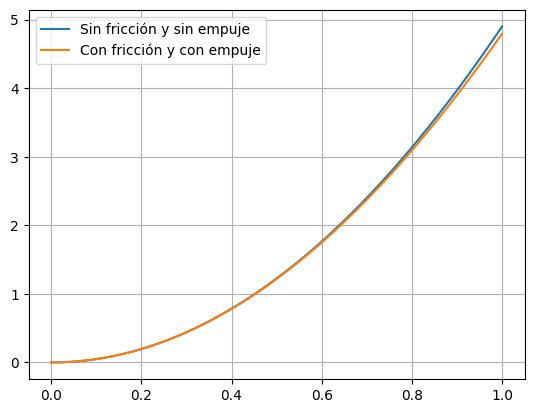

In [ ]:
plt.plot(t, xsol1[:, 0], label='Sin fricción y sin empuje')
plt.plot(t, xsol2[:, 0], label='Con fricción y con empuje')
plt.legend()
plt.grid()
plt.show()

### Ejercicios
* Simule el problema en el agua
* Simule el problema para una esfera de icopor de 2m de radio en el aire cayendo de 10 m de altura

### Velocidad límite
Si se tiene en cuenta la fricción, hay un momento en el cual la fuerza hacia abajo y hacia arriba se igualan y la aceleración se hace cero, por lo cual la velocidad es constante.
Se puede encontrar dicha velocidad analizando la curva de velocidad.
Hagamos la simulación para una objeto esfércio que cae con densidad de 1000kg/m^3 y con radio de 10cm

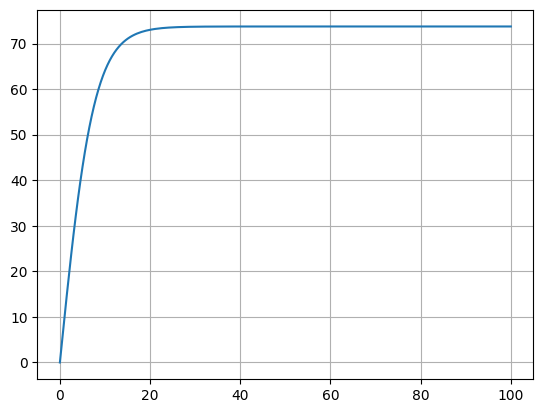

la velocidad limite es:  73.74 m/s


In [ ]:
g, p, pf, r, Cd = 9.8, 1000, 1.2, 0.1, 0.4
a = 3*Cd*pf/(8*r*p)
x0, v0 = 0, 0
R0 = [x0, v0]
# Definimos la ecuación
def ecuacion(R0, t):
  x, v = R0
  F = [v, (1-(pf/p))*g-a*v**2]
  return F
t = np.linspace(0, 100, 200)
# Solucionamos la ecuación
xsol = odeint(ecuacion, R0, t)
plt.plot(t, xsol[:, 1])
plt.grid()
plt.show()
print("la velocidad limite es: ", round(xsol[-1, 1], 2), "m/s")

### Problemas
* La densidad combinada de un paracaidas y su portador es de 800kg/m3 y su masa combianda es de 100kg. El valor de Cd=1.75. Si la velocidad máxima permitida para que el paracaidista no sufra lesiones es de 5m/s, encuentre cual debería ser el área del paracaidas.
En este caso debe partirse de la ecuación original:
$$mg-\rho_f V g-\frac{1}{2}\rho_f Cd A v^2=ma$$
* Un burbuja de aire en el agua inicia a 50cm de profundidad, con un radio de 1mm y sube por efecto del empuje. ¿Cuanto tarda en subir hasta la superficie?

In [ ]:
g, p, pf, r, Cd = 9.8, 1000, 1.2, 0.1, 0.4
a = 3*Cd*pf/(8*r*p)
x0, v0 = 0, 0
R0 = [x0, v0]
# Definimos la ecuación
def ecuacion(R0, t):
  x, v = R0
  F = [v, (1-(pf/p))*g-a*v**2]
  return F
t = np.linspace(0, 100, 200)
# Solucionamos la ecuación
xsol = odeint(ecuacion, R0, t)
plt.plot(t, xsol[:, 1])
plt.grid()
plt.show()
print("la velocidad limite es: ", round(xsol[-1, 1], 2), "m/s")

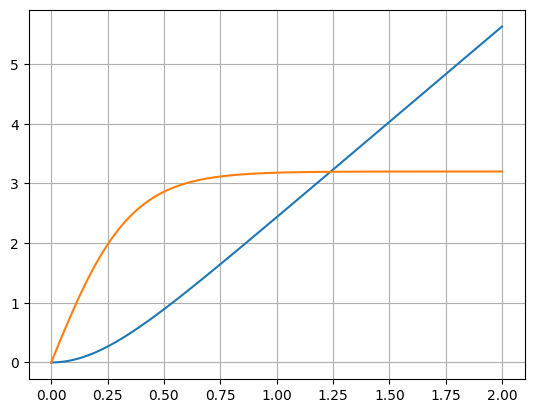

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
g, p, pf, r, Cd = 9.8, 20, 1.2, 0.01, 0.4
a = 3*Cd*pf/(8*r*p)
x0, v0 = 0, 0
R0 = [x0, v0]
def ecuacion(R0, t):
  x, v = R0
  F = [v, (1-(pf/p))*g-a*v**2]
  return F
t = np.linspace(0, 2, 200)
xsol = odeint(ecuacion, R0, t)
plt.plot(t, xsol[:, 0])
plt.plot(t, xsol[:, 1])
plt.grid()
plt.show()

In [50]:
# Solución del problema con fricción y con empuje
# para una esfera de aluminio (27000kg/m3) de 5mm de radio que cae en el aire (1.2kg/m3)
g, p, pf, r, Cd = 9.8, 20, 1.2, 0.005, 0.4
a = 3*Cd*pf/(8*r*p)
x0, v0 = 0, 0
R0 = [x0, v0]
N = 200
# Definimos la ecuación
def ecuacion(R0, t):
  x, v = R0
  F = [v, (1-(pf/p))*g-a*v**2]
  return F
t = np.linspace(0, 2, N)

# Solucionamos la ecuación
xsol = odeint(ecuacion, R0, t)
# Restringimos el valor de L hasta un metro
L = []
T = []
vf = 0
for i in range(N-1):
  if xsol[i,0]<1:
    T.append(t[i])
    L.append(xsol[i,0])
    vf = round(xsol[i,1],2)
print("El tiempo que tarda en recorrer: ", round(L[-1], 2), " metros ", " es: ", round(T[-1],2), " segundos")
print("La velocidad límite es: ", vf)

El tiempo que tarda en recorrer:  0.98  metros   es:  0.6  segundos
La velocidad límite es:  2.23


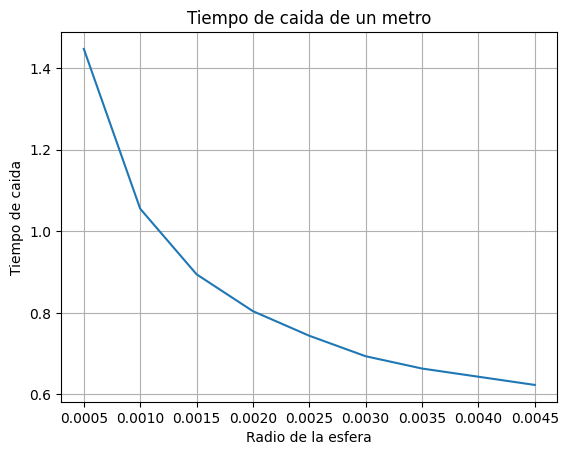

In [61]:
# Solución del problema con fricción y con empuje
# para una esfera de aluminio (27000kg/m3) de 5mm de radio que cae en el aire (1.2kg/m3)
g, p, pf, Cd = 9.8, 20, 1.2, 0.4
TT = []
RR = []
for j in range(1, 10):
  r=0.0005*j
  a = 3*Cd*pf/(8*r*p)
  x0, v0 = 0, 0
  R0 = [x0, v0]
  N = 200
  # Definimos la ecuación
  def ecuacion(R0, t):
    x, v = R0
    F = [v, (1-(pf/p))*g-a*v**2]
    return F
  t = np.linspace(0, 2, N)

  # Solucionamos la ecuación
  xsol = odeint(ecuacion, R0, t)
  # Restringimos el valor de L hasta un metro
  L = []
  T = []
  vf = 0
  for i in range(N-1):
    if xsol[i,0]<1:
      T.append(t[i])
      L.append(xsol[i,0])
      vf = round(xsol[i,1],2)
  TT.append(T[-1])
  RR.append(r)
plt.plot(RR, TT)
plt.title("Tiempo de caida de un metro")
plt.xlabel("Radio de la esfera")
plt.ylabel("Tiempo de caida")
plt.grid()
plt.show()